In [5]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
import scipy.special
from matplotlib import animation, rc
from IPython.display import HTML  
from scipy.spatial import ConvexHull, convex_hull_plot_2d
plt.style.use('seaborn-darkgrid')

In [22]:

class DLA(object):
    
    def __init__(self, N, k, w,power):
        self.N = N
        self.k = k
        self.w = w
        self.power=power
        self.object_list=[]
        self.candidates=[]
        
        #the first object
    def initial_c_ij(self):
        c_ij=np.zeros([self.N,self.N])
        c_ij[0]=1
        self.object_list=[(self.N-1, int(self.N/2))]
        return c_ij,self.object_list
        
    def successive(self,c_ij):
        for g in range(k):
            c_old = c_ij.copy()
            c_stop=np.zeros([self.N,self.N])
            for i in range(len(c_ij)):
                for j in range(len(c_ij[0])):
                    if (i,j) in self.object_list:
                        c_ij[i,j]=0
                    elif i==0 :
                        c_ij[i,j]=1
                    elif i==len(c_ij[0])-1 :
                        c_ij[i,j]=0
                #lefside
                    elif j==0 and i!=0 and i!=len(c_ij[0])-1:
                        c_ij[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1])
                #rightside        
                    elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                        c_ij[i,j] =(1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1])
                    else:
                        c_ij[i,j] = (w/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1])+(1-w)*c_ij[i,j]      
            for i in range(len(c_ij)):
                for j in range(len(c_ij[0])): 
                    c_stop[i,j]=abs(c_old[i,j]-c_ij[i,j])           
            if np.max(c_stop)<1e-5:
                break
            else:
                continue         
        return c_ij,g
    
    def object_change(self,c_ij):
#         candidates=[]
        for (i,j) in self.object_list:
            dx, dy = [-1, 0, 0, 1], [0, -1, 1, 0]
            for x, y in zip(dx, dy):
                u = i + x
                v = j + y
                if u >= 0 and u < self.N-1 and v >=0 and v < self.N:
                    if (u, v) not in self.object_list and (u, v) not in self.candidates:
                        self.candidates.append((u,v))
#         print('1',self.candidates) 
        for tmp1, tmp2 in self.candidates:
            if c_ij[tmp1][tmp2]<0:
                c_ij[tmp1][tmp2]=0

        sum_scores = sum([c_ij[tmp1][tmp2]**self.power for tmp1, tmp2 in self.candidates])
        scores = [c_ij[tmp1][tmp2]**self.power/sum_scores for tmp1, tmp2 in self.candidates]
        success=random.choices(self.candidates, scores)[0]
        self.object_list.append(success)
        self.candidates.remove(success)
        for i in range(len(c_ij)):
                for j in range(len(c_ij[0])):
                    if (i,j) in self.object_list:
                        c_ij[i,j]=0
        return c_ij
                
    def change_color(self,c_ij) :
        for (u,v) in self.object_list:
            c_ij[u][v]=1
        return c_ij
    
    def process(self):
        c_ij = self.initial_c_ij()[0]
        for i in range(200):
            c_ij=self.successive(c_ij)[0]
            c_ij=self.object_change(c_ij)
            if i ==65:
                c_ij_25=c_ij
                object_25=self.object_list
            if i ==130:
                c_ij_75=c_ij
                object_75=self.object_list
        c_ij=self.change_color(c_ij)
        print(len(self.object_list))
#         sns.heatmap(c_ij,cmap="GnBu")
#         plt.show()
        return c_ij_25,object_25,c_ij_75,object_75,c_ij,self.object_list
            
    

In [23]:
k=10000
N=100
w=1.9
dla=DLA(N,k,w,power=0.5)
c_ij_25,object_25,c_ij_75,object_75,c_ij,object_list=dla.process()
dla=DLA(N,k,w,power=1)
c_ij_25_1,object_25_1,c_ij_75_1,object_75_1,c_ij_1,object_list_1=dla.process()
dla=DLA(N,k,w,power=1.5)
c_ij_25_2,object_25_2,c_ij_75_2,object_75_2,c_ij_2,object_list_2=dla.process()
dla=DLA(N,k,w,power=2)
c_ij_25_3,object_25_3,c_ij_75_3,object_75_3,c_ij_3,object_list_3=dla.process()

201
201
201
201


In [206]:
dla=DLA(N,k,w,power=0.5)
c_ij_25,object_25,c_ij_75,object_75,c_ij_05,object_list_05=dla.process()

201


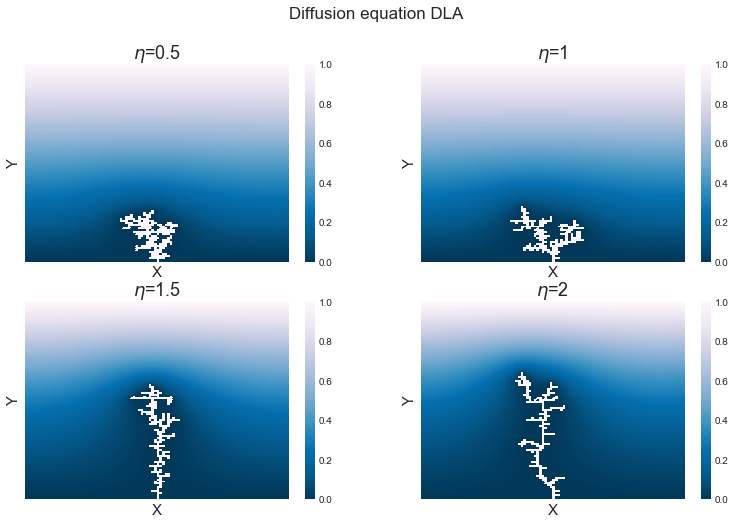

In [233]:
plt.figure(figsize=(13,8))
plt.suptitle("Diffusion equation DLA",fontsize=17)
plt.subplot(2,2,1)
sns.heatmap(c_ij_05,cmap="PuBu_r")
plt.title('$\eta$=0.5',size=18)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,2)
sns.heatmap(c_ij_1,cmap="PuBu_r")
plt.title('$\eta$=1',size=18)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,3)
sns.heatmap(c_ij_2,cmap="PuBu_r")
plt.title('$\eta$=1.5',size=18)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,4)
sns.heatmap(c_ij_3,cmap="PuBu_r")
plt.title('$\eta$=2',size=18)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.savefig('DLA_different.jpg',dpi=200,bbox_inches='tight')
plt.show()

# Density

In [208]:
dens_0_5=len(object_list_05)/ConvexHull(object_list_05).area
dens__1=len(object_list_1)/ConvexHull(object_list_1).area
dens_1_5=len(object_list_1)/ConvexHull(object_list_2).area
dens__2=len(object_list_1)/ConvexHull(object_list_3).area

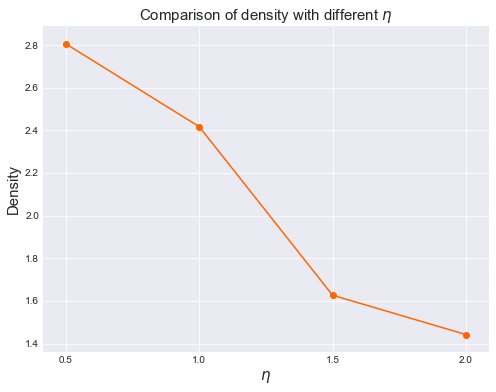

In [234]:
plt.figure(figsize=(8,6))
etalist=[0.5,1,1.5,2]
plt.title("Comparison of density with different $\eta$",size=15)
plt.plot(etalist,[dens_0_5,dens__1,dens_1_5,dens__2],color='#ff6600')
plt.scatter(etalist,[dens_0_5,dens__1,dens_1_5,dens__2],color='#ff6600')
plt.xticks(etalist)
plt.xlabel('$\eta$',size=15)
plt.ylabel('Density',size=15)
plt.savefig('DLA_different_density_of.jpg',dpi=200)

# optimal omg

In [79]:
def successive(w,object_list,k=100000,maxnumber=1e-5):
    N=100
    c_ij=np.zeros([N,N])
    for g in range(k):
        c_old = c_ij.copy()
        c_stop=np.zeros([N,N])
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])):
                if (i,j) in object_list:
                    c_ij[i,j]=0
                elif i==0 :
                    c_ij[i,j]=1
                elif i==len(c_ij[0])-1 :
                    c_ij[i,j]=0
            #lefside
                elif j==0 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] = (1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,len(c_ij[0])-1])
            #rightside        
                elif j==len(c_ij[0])-1 and i!=0 and i!=len(c_ij[0])-1:
                    c_ij[i,j] =(1/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,1]+c_ij[i,j-1])
                else:
                    c_ij[i,j] = (w/4)*(c_ij[i+1,j]+c_ij[i-1,j]+c_ij[i,j+1]+c_ij[i,j-1])+(1-w)*c_ij[i,j]      
            
        for i in range(len(c_ij)):
            for j in range(len(c_ij[0])): 
                c_stop[i,j]=abs(c_old[i,j]-c_ij[i,j])           
                    
        if np.max(c_stop)<maxnumber:
            print(g)
            break
        else:
            continue
             
    return c_ij,g

def optimal_omg(object_list):
    wlist=np.arange(1.91,1.99,0.01)
    iterationlist=[successive(i,object_list)[1] for i in wlist]
    
    optim_omg=wlist[np.argmin(iterationlist)]
    
    return optim_omg

In [74]:
zero_5=[object_25,object_75,object_list]
one_zero=[object_25_1,object_75_1,object_list_1]
one_5=[object_25_2,object_75_2,object_list_2]
two_0=[object_25_3,object_75_3,object_list_3]
finallist_result=[object_list,object_list_1,object_list_2,object_list_3]

In [80]:
first=[optimal_omg(i) for i in zero_5]
second=[optimal_omg(i) for i in one_zero]
third=[optimal_omg(i) for i in one_5]
four=[optimal_omg(i) for i in two_0]

662
614
566
518
469
421
381
501
906
662
614
566
518
469
421
381
501
906
662
614
566
518
469
421
381
501
906
609
565
522
478
435
391
365
499
901
609
565
522
478
435
391
365
499
901
609
565
522
478
435
391
365
499
901
455
425
395
366
336
308
325
491
881
455
425
395
366
336
308
325
491
881
455
425
395
366
336
308
325
491
881
415
389
362
336
310
285
325
471
841
415
389
362
336
310
285
325
471
841
415
389
362
336
310
285
325
471
841


In [87]:
normal=optimal_omg([])

750
695
639
583
526
470
415
522
986


In [96]:
first.append(normal)
second.append(normal)
third.append(normal)
four.append(normal)

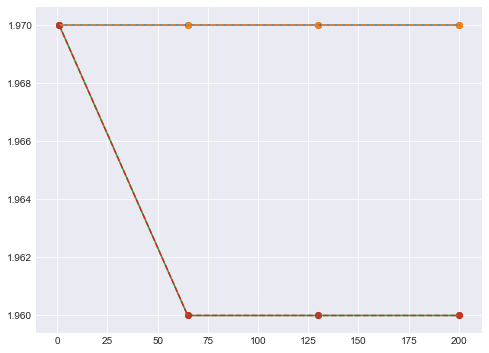

In [176]:
plt.figure(figsize=(8,6))
etalist=[1,65,130,200]
plt.plot(etalist,first[::-1])
plt.plot(etalist,second[::-1],'--')
plt.plot(etalist,third[::-1])
plt.plot(etalist,four[::-1],'--')
plt.scatter(etalist,first[::-1])
plt.scatter(etalist,second[::-1])
plt.scatter(etalist,third[::-1])
plt.scatter(etalist,four[::-1])

In [178]:
number_of_object=np.array([1,65,130,200])


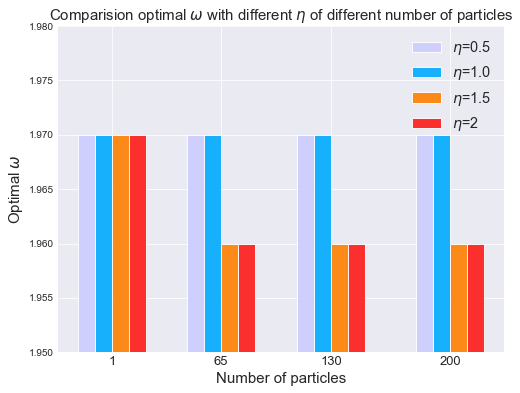

In [260]:
plt.figure(figsize=(8,6))
plt.bar(number_of_object-15,first[::-1], alpha=0.9, width = 10, facecolor = '#ccccff', edgecolor = 'white', label='$\eta$=0.5', lw=1)
plt.bar(number_of_object-5,second[::-1], alpha=0.9, width =10, facecolor = '#00aaff', edgecolor = 'white', label='$\eta$=1.0', lw=1)
plt.bar(number_of_object+5,third[::-1], alpha=0.9, width =10, facecolor = '#ff8000', edgecolor = 'white', label='$\eta$=1.5', lw=1)
plt.bar(number_of_object+15,four[::-1], alpha=0.9, width =10, facecolor = '#ff1a1a', edgecolor = 'white', label='$\eta$=2', lw=1)
plt.title('Comparision optimal $\omega$ with different $\eta$ of different number of particles',size=15)
plt.xticks(number_of_object,size=13)
plt.xlabel('Number of particles',size=15)
plt.ylabel('Optimal $\omega$',size=15)
# plt.yscale('log')
plt.legend(fontsize='x-large')
plt.ylim(1.95,1.98)
plt.savefig('Comparision_optimal_omg.jpg',dpi=200)
plt.show()

# Monte Carlo simulation

In [144]:
class montecarlo(object):
    def __init__(self, randomwalk_number=30000, N=100, sticking_factor=1):
        self.N = N
        self.sticking_factor=sticking_factor
        self.randomwalk_number=randomwalk_number
        self.object_list=[(self.N-1, int(self.N/2))]
        self.c_ij=np.zeros([self.N,self.N])
    
    def randomwalk(self):
        for i in range(self.randomwalk_number):
            candidates = self.object_around()
            pos = [x, y] = [0, np.random.randint(self.N)]
#             print(candidates)
            while True:
                old_position=pos
                next_one=random.randint(1, 4)
                if (pos[0],pos[1]) in candidates:
                    if np.random.rand() < self.sticking_factor:
                        self.object_list.append((pos[0],pos[1]))
                        break
                    else:
                        old_position = pos
              
                if (pos[0],pos[1]) in self.object_list:
                    pos=old_position
                            
                if next_one==1:
                    if pos[1] <0:
                        pos[1]= self.N-1
                    else :
                        pos[1] -=1
                        continue
                if next_one==2:
                    if pos[0] >self.N-1:
                        break
                    else :
                        pos[0] +=1
                        continue    
                if next_one==3:
                    if pos[1] >self.N-1:
                        pos[1]= 0
                    else :
                        pos[1] +=1
                        continue
                if next_one==4:
                    if pos[0] <0:
                        break
                    else :
                        pos[0] -=1
                        continue   

    def object_around(self):
        candidates=[]
        for (i,j) in self.object_list:
            dx, dy = [-1, 0, 0, 1], [0, -1, 1, 0]
            for x, y in zip(dx, dy):
                u = i + x
                v = j + y
                if u >= 0 and u < self.N-1 and v >=0 and v < self.N:
                    if (u, v) not in self.object_list and (u, v) not in candidates:
                        candidates.append((u,v))
        return candidates                   
        
    def process(self):
        self.randomwalk()
        for (u, v) in self.object_list:
            self.c_ij[u][v]=1 
#         sns.heatmap(self.c_ij,cmap="GnBu")
#         print(len(self.object_list))
        return self.c_ij,self.object_list
            
        
    

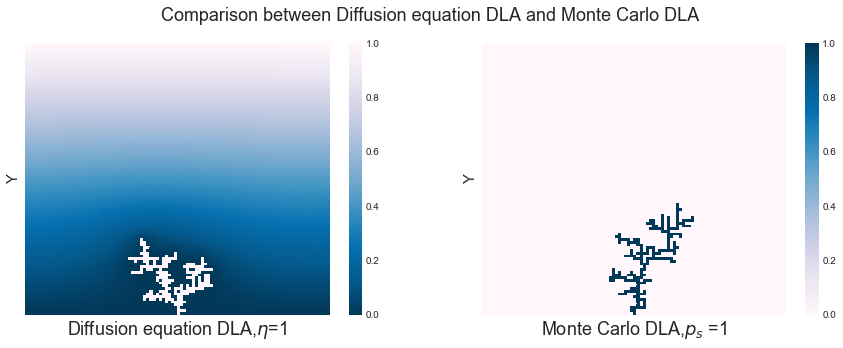

In [243]:
plt.figure(figsize=(15,5))
plt.suptitle('Comparison between Diffusion equation DLA and Monte Carlo DLA',size=18)
plt.subplot(1,2,1)
sns.heatmap(c_ij_1,cmap="PuBu_r")
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('Diffusion equation DLA,$\eta$=1',size=18)
plt.ylabel('Y',size=15)
plt.subplot(1,2,2)
sns.heatmap(c_ijlist_mon_1[3],cmap="PuBu")
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('Monte Carlo DLA,$p_s$ =1',size=18)
plt.ylabel('Y',size=15)
plt.savefig('comparison_mc_growth.jpg',dpi=200,bbox_inches='tight')

In [257]:
density_111=200/ConvexHull(object_list_1).area
density_222=200/ConvexHull(objectlist_mon_1[2]).area
print(density_111,density_222)

2.4047634615908846 2.1560939785893964


In [145]:
stickinglist=[0.1,0.4,0.7,1]
c_ijlist_mon=[]
objectlist_mon=[]
for i in stickinglist:
    monte=montecarlo(sticking_factor=i)
    c_ij,object_1=monte.process()
    c_ijlist_mon.append(c_ij)
    objectlist_mon.append(object_1)

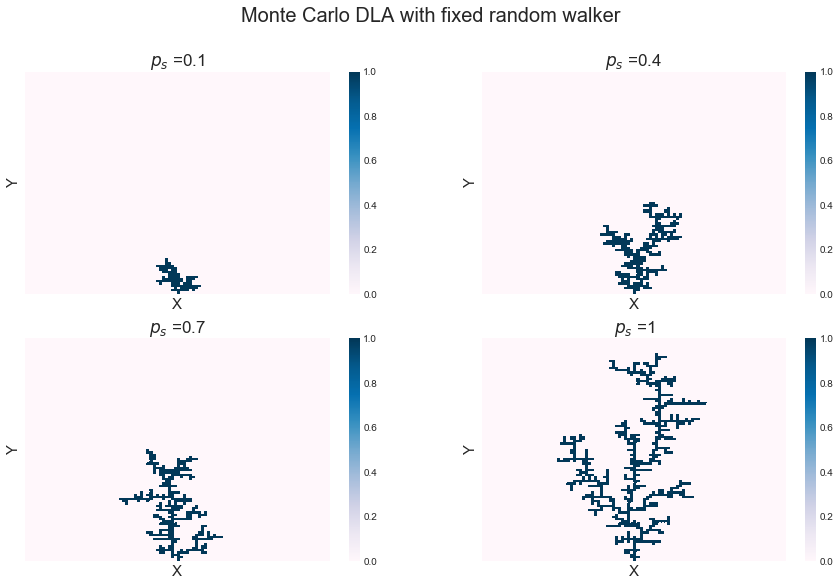

In [246]:

plt.figure(figsize=(15,9))
plt.suptitle("Monte Carlo DLA with fixed random walker",fontsize=20)
plt.subplot(2,2,1)
sns.heatmap(c_ijlist_mon[0],cmap="PuBu")
plt.title('$p_s$ =0.1',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,2)
sns.heatmap(c_ijlist_mon[1],cmap="PuBu")
plt.title('$p_s$ =0.4',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,3)
sns.heatmap(c_ijlist_mon[2],cmap="PuBu")
plt.title('$p_s$ =0.7',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,4)
sns.heatmap(c_ijlist_mon[3],cmap="PuBu")
plt.title('$p_s$ =1',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.savefig('montecarlo_eta.jpg',dpi=200,bbox_inches='tight')

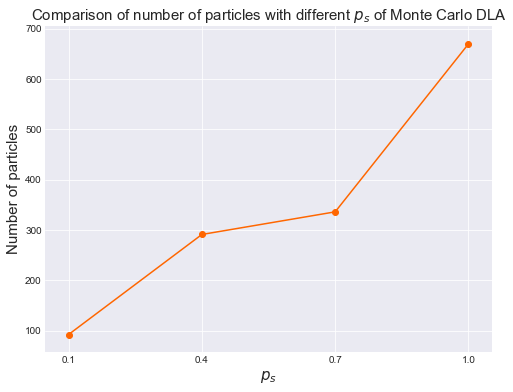

In [261]:
plt.figure(figsize=(8,6))
plt.plot(stickinglist,[len(objectlist_mon[i]) for i in range(len(objectlist_mon))],color='#ff6600')
plt.title("Comparison of number of particles with different $p_s$ of Monte Carlo DLA",size=15)
plt.scatter(stickinglist,[len(objectlist_mon[i]) for i in range(len(objectlist_mon))],color='#ff6600')
plt.xlabel('$p_s$',size=15)
plt.ylabel('Number of particles',size=15)
plt.xticks(stickinglist)
plt.savefig('montecarlo_compare_number_of_object.jpg',dpi=200)

In [200]:
area__1=np.array([ConvexHull(objectlist_mon[i]).area for i in range(len(objectlist_mon))])
density__1=np.array([len(objectlist_mon[i]) for i in range(len(objectlist_mon))])/area

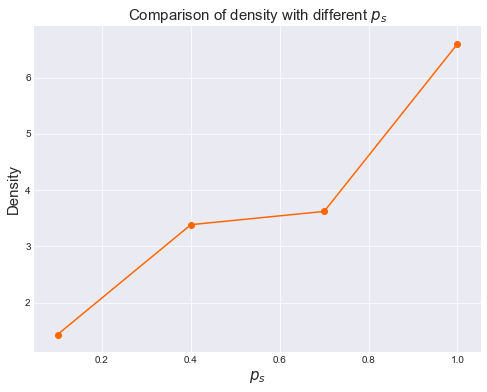

In [202]:
plt.figure(figsize=(8,6))
plt.plot(stickinglist,density__1,color='#ff6600')
plt.title("Comparison of density with different $p_s$",size=15)
plt.scatter(stickinglist,density__1,color='#ff6600')
plt.xlabel('$p_s$',size=15)
plt.ylabel('Density',size=15)
plt.savefig('Comparison_of_density_with_samerandom.jpg',dpi=200)

In [153]:
class montecarlo_fixed(object):
    def __init__(self, number_object=200, N=100, sticking_factor=1):
        self.N = N
        self.sticking_factor=sticking_factor
        self.number_object=number_object
#         self.randomwalk_number=randomwalk_number
        self.object_list=[(self.N-1, int(self.N/2))]
        self.c_ij=np.zeros([self.N,self.N])
        self.k=0
    
    def randomwalk(self):
        while True:
            
            candidates = self.object_around()
            pos = [x, y] = [0, np.random.randint(self.N)]
            if len(self.object_list)==self.number_object:
                    break
            self.k+=1
            while True:
                old_position=pos
                next_one=random.randint(1, 4)
                if (pos[0],pos[1]) in candidates:
                    if np.random.rand() < self.sticking_factor:
                        self.object_list.append((pos[0],pos[1]))
                        break
                    else:
                        old_position = pos
              
                if (pos[0],pos[1]) in self.object_list:
                    pos=old_position
                            
                if next_one==1:
                    if pos[1] <0:
                        pos[1]= self.N-1
                    else :
                        pos[1] -=1
                        continue
                if next_one==2:
                    if pos[0] >self.N-1:
                        break
                    else :
                        pos[0] +=1
                        continue    
                if next_one==3:
                    if pos[1] >self.N-1:
                        pos[1]= 0
                    else :
                        pos[1] +=1
                        continue
                if next_one==4:
                    if pos[0] <0:
                        break
                    else :
                        pos[0] -=1
                        continue

    def object_around(self):
        candidates=[]
        for (i,j) in self.object_list:
            dx, dy = [-1, 0, 0, 1], [0, -1, 1, 0]
            for x, y in zip(dx, dy):
                u = i + x
                v = j + y
                if u >= 0 and u < self.N-1 and v >=0 and v < self.N:
                    if (u, v) not in self.object_list and (u, v) not in candidates:
                        candidates.append((u,v))
        return candidates                   
        
    def process(self):
        self.randomwalk()
        for (u, v) in self.object_list:
            self.c_ij[u][v]=1 
#         sns.heatmap(self.c_ij,cmap="GnBu")
#         print(len(self.object_list))
        return self.c_ij,self.object_list,self.k

In [156]:
stickinglist=[0.1,0.4,0.7,1]
c_ijlist_mon_1=[]
objectlist_mon_1=[]
klist=[]
for i in stickinglist:
    monte=montecarlo_fixed(sticking_factor=i)
    c_ij,object_1,k=monte.process()
    c_ijlist_mon_1.append(c_ij)
    objectlist_mon_1.append(object_1)
    klist.append(k)

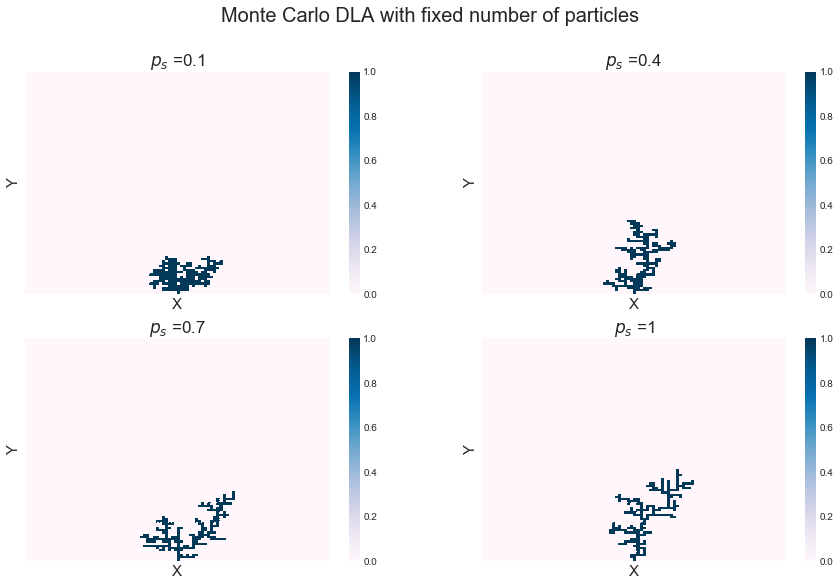

In [262]:

plt.figure(figsize=(15,9))
plt.suptitle("Monte Carlo DLA with fixed number of particles",fontsize=20)
plt.title('Monte Carlo DLA',size=15)
plt.subplot(2,2,1)
sns.heatmap(c_ijlist_mon_1[0],cmap="PuBu")
plt.title('$p_s$ =0.1',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,2)
sns.heatmap(c_ijlist_mon_1[1],cmap="PuBu")
plt.title('$p_s$ =0.4',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,3)
sns.heatmap(c_ijlist_mon_1[2],cmap="PuBu")
plt.title('$p_s$ =0.7',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.subplot(2,2,4)
sns.heatmap(c_ijlist_mon_1[3],cmap="PuBu")
plt.title('$p_s$ =1',size=17)
plt.xticks([]) 
plt.yticks([]) 
plt.xlabel('X',size=15)
plt.ylabel('Y',size=15)
plt.savefig('montecarlo_fixed_number_of_object.jpg',dpi=200,bbox_inches='tight')

In [163]:
area=np.array([ConvexHull(objectlist_mon_1[i]).area for i in range(len(objectlist_mon_1))])

In [164]:
density=200/area

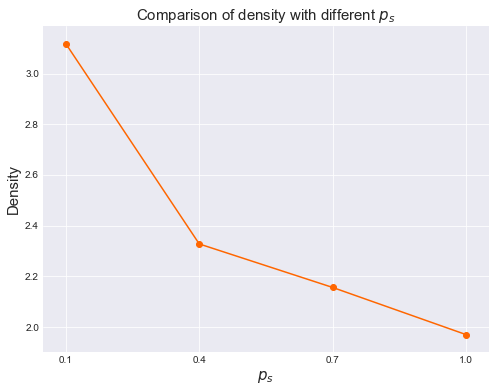

In [250]:
plt.figure(figsize=(8,6))
plt.plot(stickinglist,density,color='#ff6600')
plt.title("Comparison of density with different $p_s$",size=15)
plt.scatter(stickinglist,density,color='#ff6600')
plt.xlabel('$p_s$',size=15)
plt.ylabel('Density',size=15)
plt.xticks(stickinglist)
plt.savefig('Comparison_of_density_with_different_ps.jpg',dpi=200)

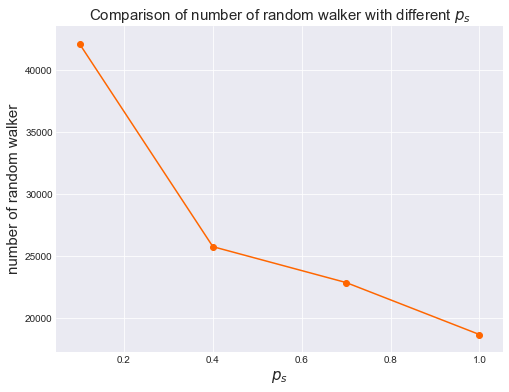

In [169]:
plt.figure(figsize=(8,6))
plt.plot(stickinglist,klist,color='#ff6600')
plt.title("Comparison of number of random walker with different $p_s$",size=15)
plt.scatter(stickinglist,klist,color='#ff6600')
plt.xlabel('$p_s$',size=15)
plt.ylabel('number of random walker',size=15)
plt.savefig('Comparison_of_number_of_randomwalker_with_different_ps.jpg',dpi=200)

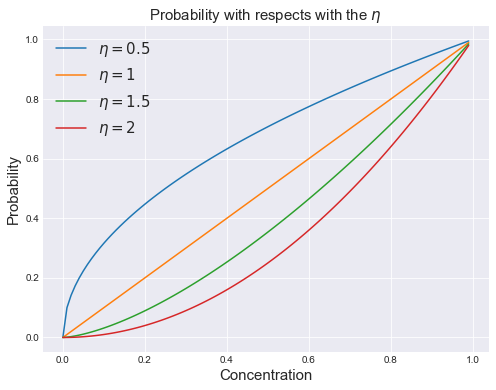

In [253]:
plt.figure(figsize=(8,6))
plt.title("Probability with respects with the $\eta$",size=15)
x=np.arange(0,1,0.01)
plt.plot(x,x**(1/2),label='$\eta =0.5$')
plt.plot(x,x**(1),label='$\eta =1$')
plt.plot(x,x**(1.5),label='$\eta =1.5$')
plt.plot(x,x**(2),label='$\eta =2$')
plt.xlabel('Concentration',size=15)
plt.ylabel('Probability',size=15)
plt.legend(fontsize=15)
plt.savefig('probability_how_eta.jpg',dpi=200)

## 2.3 The Gray-Scott model - A reaction-diffusion system

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
def neighb(i,j):
    
    lastind = spacesteps-1
        
    #leftside
    if i==0 and j!=0 and j!=lastind:
        i_l = -1
        i_r = i+1
        j_u = j-1
        j_d = j+1
    
    #rightside        
    elif i==lastind and j!=0 and j!=lastind:
        i_l = i-1
        i_r = 0
        j_u = j-1
        j_d = j+1    
    
    #topside
    elif j==0 and i!=0 and i!=lastind:
        i_l = i-1
        i_r = i+1
        j_u = -1
        j_d = j+1    
        
    #bottomside      
    elif j==lastind and i!=0 and i!=lastind:
        i_l = i-1
        i_r = i+1
        j_u = j-1
        j_d = 0    
    
    #corners
    elif (i==0 and j==0):
        i_l = -1
        i_r = i+1
        j_u = -1
        j_d = j+1
    elif (i==0 and j==lastind):
        i_l = -1
        i_r = i+1
        j_u = j-1
        j_d = 0
    elif (i==lastind and j==0):
        i_l = i-1
        i_r = 0
        j_u = -1
        j_d = j+1
    elif (i==lastind and j==lastind):
        i_l = i-1
        i_r = 0
        j_u = j-1
        j_d = 0
    
    # all other lattice points
    else:
        i_l = i-1
        i_r = i+1
        j_u = j-1
        j_d = j+1     

    return i_l,i_r,j_u,j_d

def next_u(t,i,j):
    
    try:
    
        i_l,i_r,j_u,j_d = neighb(i,j)

        u[t,i,j] = u[t-1,i,j] + dt*(Du/dx**2 * (u[t-1,i_r,j] + u[t-1,i_l,j] + u[t-1,i,j_d] + u[t-1,i,j_u] - 4*u[t-1,i,j]) - u[t-1,i,j]*(v[t-1,i,j])**2 + f*(1-u[t-1,i,j]))
    
    except:
        
        print('u',t,i,j)
    
    return u[t,i,j]
    
def next_v(t,i,j):
    
    try:
    
        i_l,i_r,j_u,j_d = neighb2(i,j)

        v[t,i,j] = v[t-1,i,j] + dt*(Dv/dx**2 * (v[t-1,i_r,j] + v[t-1,i_l,j] + v[t-1,i,j_d] + v[t-1,i,j_u] - 4*v[t-1,i,j]) + u[t-1,i,j]*(v[t-1,i,j])**2 - (f+k)*v[t-1,i,j])
    
    except:
        
        print('v',t,i,j)
        
    return v[t,i,j] 

def GrayScott():
    
    for t in range(1,timesteps):
    
        for i in range(spacesteps):

            for j in range(spacesteps):
                
                if np.random.rand() < 5/timesteps:
                    u[t,i,j] = 0.5
                else:
                    u[t,i,j] = next_u(t,i,j)
                    
                v[t,i,j] = next_v(t,i,j)   
                
    return u,v

In [ ]:
timesteps = 10000
spacesteps = 100
dt = 1
dx = 1 # dy = dx
Du = 0.16
Dv = 0.08
f = 0.035 #(stripes) #0.035 (V dominant) #0.085 (yellow) #0.045 (small lines)#0.020 (yellow) #0.050 (few bubbles)  #0.0350 (semi stripes) #0.0350 (large semi stripes) #0.0350 (doesn't work) #0.0350 (larger bubbles) #0.0300 (doesn't work) #0.0300 (doesn't work) #0.0300 (larger stripes) #0.0325  #0.0300 (bubbles) #0.035 (stripes)
k = 0.060 #(stripes) #0.040 (V dominant) #0.060 (yellow) #0.060 (small lines) #0.060 (yellow) #0.060 (few bubbles) #0.0580 (semi stripes) #0.0588 (large semi stripes) #0.0525 (doesn't work) #0.0575 (larger bubbles) #0.0525 (doesn't work) #0.0600 (doesn't work) #0.0575 (larger stripes) #0.0575 #0.0550 (bubbles) #0.060 (stripes)

# increasing k above about 0.0600 will result in U to be dominant in equilibrium. decreasing k to below about 0.0550 will make V dominant. 

u = np.zeros((timesteps,spacesteps,spacesteps))
u[0,:,:] = 0.5
v = np.zeros((timesteps,spacesteps,spacesteps))
v[0,int(4*spacesteps/10):int(7*spacesteps/10),int(4*spacesteps/10):int(7*spacesteps/10)] = 0.25

u_results,v_results = GrayScott()

In [ ]:
def animate(results,Nsample):
    
    tsamples = [int(i) for i in np.linspace(0,len(results)-1,Nsample)]
    tintervals = len(tsamples)
    
    fig = plt.figure()
    image = plt.imshow(results[0,:,:],extent=[0,1,0,1],animated=True)
    plt.xticks((0,1))
    plt.yticks((0,1))
    cbar = plt.colorbar(image)
    #cbar.ax.set_ylabel('Concentration')
    
    def animate(i):
        sample = tsamples[i]
        
        image.set_array(results[sample,:,:])
        return image,
    
    time_anim = animation.FuncAnimation(fig, animate, frames=tintervals,interval=50, blit=True)
    
    return time_anim

Nsample = 1000
anim_u = animate(u_results,Nsample)
anim_v = animate(v_results,Nsample)

plt.close()

In [ ]:
HTML(anim_u.to_html5_video())

In [ ]:
HTML(anim_v.to_html5_video())